# ***Engr.Muhammad Javed***

## *Importing Required Libraries*


In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs , make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer , make_circles
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix



In [4]:
pd.set_option('display.max_columns', 50)


## *Loading the Dataset*


In [5]:
Dataset = pd.read_csv(r"E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\WA_Fn-UseC_-HR-Employee-Attrition.csv")

## *Show Dataset*


In [6]:
Dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## *Removing Unnecessary Columns from the Dataset*


In [7]:
Dataset.drop(["EmployeeCount" , "Over18" , "StandardHours" ,"EmployeeNumber"] , axis = 1 , inplace = True)

## *Encoding Target Variable* 

In [8]:
Dataset["Attrition"] = Dataset["Attrition"].map({"Yes" : 1 , "No" : 0})

In [9]:
Dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## *Encoding Categorical Columns using One-Hot Encoding*


In [10]:
cat_cols = Dataset.select_dtypes(include = "object").columns

Dataset = pd.get_dummies(Dataset , columns = cat_cols , drop_first=True)

## *Splitting Features and target Variable*


In [11]:
X = Dataset.drop(["Attrition"] , axis = 1)
Y = Dataset["Attrition"]

## *Splitting Dataset into Training and Testing Sets*


In [12]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2  , random_state=42 , stratify=Y )

## **Applying Decision Tree Classifier Model**


## *Training the Model using Decision Tree Classifier*


In [13]:
model1 = DecisionTreeClassifier(criterion="entropy" , max_depth=5,  random_state = 42)
model1.fit(X_train , Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## *Making Predictions using the Trained Decision Tree Model*


In [14]:
y_pred = model1.predict(X_test)

## *Evaluating the Performance of the Decision Tree Model*


In [15]:
print("Accurarcy : " , accuracy_score(Y_test , y_pred)*100)
print(classification_report(Y_test , y_pred))

Accurarcy :  79.59183673469387
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.35      0.32      0.33        47

    accuracy                           0.80       294
   macro avg       0.61      0.60      0.61       294
weighted avg       0.79      0.80      0.79       294



## *Visualizing the Confusion Matrix for Decision Tree Model*


<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2331151357.py:5: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Confusion_Matrix(Decision Tree).png")


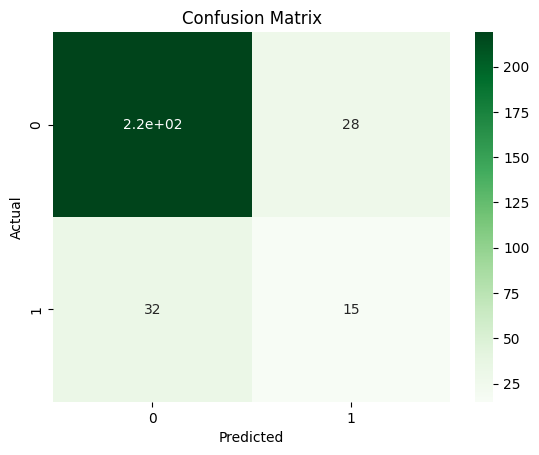

In [16]:
sn.heatmap(confusion_matrix(Y_test , y_pred) , annot = True , cmap = "Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Confusion_Matrix(Decision Tree).png")

## *Visualizing the Correlation Heatmap of Numerical Features*


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2029336788.py:4: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Heatmap (Decision Tree)).png")


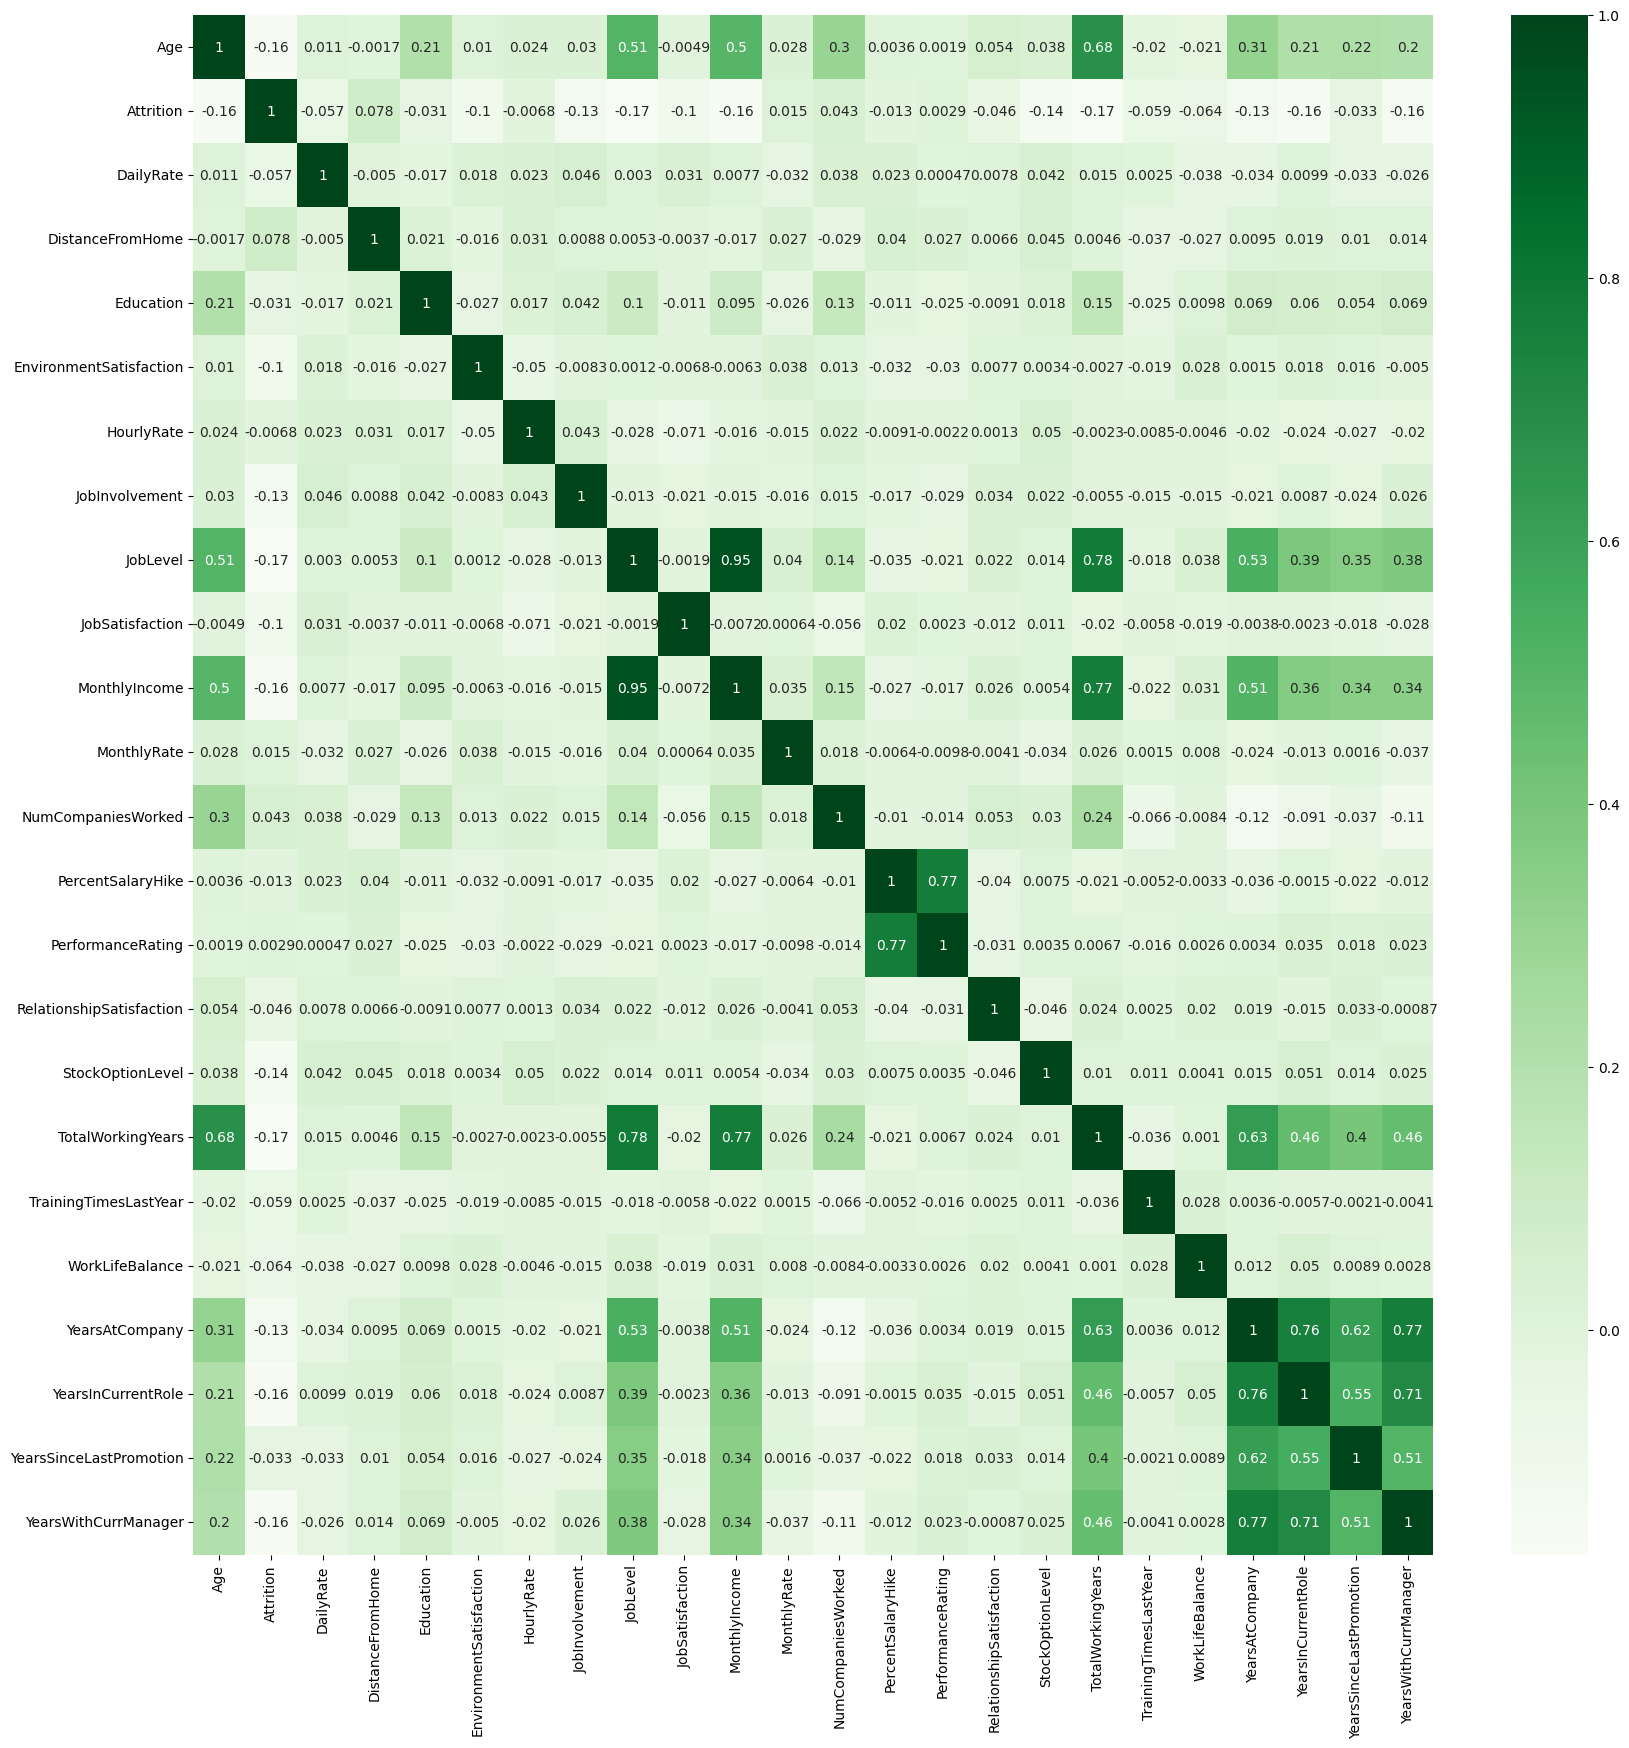

In [17]:
plt.figure(figsize=(20 , 20))
df1 = Dataset.select_dtypes("int64")
sn.heatmap(df1.corr(), annot = True ,cmap = "Greens")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Heatmap (Decision Tree)).png")

plt.show()

## *Viewing Feature Importance of the Decision Tree Model*


In [18]:
importance = pd.Series(model1.feature_importances_ , index = X.columns).sort_values(ascending=False)
importance

TotalWorkingYears                    0.193385
OverTime_Yes                         0.151047
MonthlyIncome                        0.089159
Age                                  0.085778
StockOptionLevel                     0.071867
EnvironmentSatisfaction              0.058031
DailyRate                            0.050805
NumCompaniesWorked                   0.044928
HourlyRate                           0.044053
JobRole_Research Scientist           0.035821
YearsInCurrentRole                   0.035475
YearsAtCompany                       0.027091
MaritalStatus_Single                 0.024226
WorkLifeBalance                      0.021935
MonthlyRate                          0.017280
YearsWithCurrManager                 0.016750
JobRole_Sales Representative         0.016501
YearsSinceLastPromotion              0.015868
DistanceFromHome                     0.000000
Education                            0.000000
JobSatisfaction                      0.000000
JobLevel                          

##  *Visualizing the Feature Importance (Decision Tree Classifier)*

<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2077912273.py:9: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Feature Importances (Decision Tree).png")


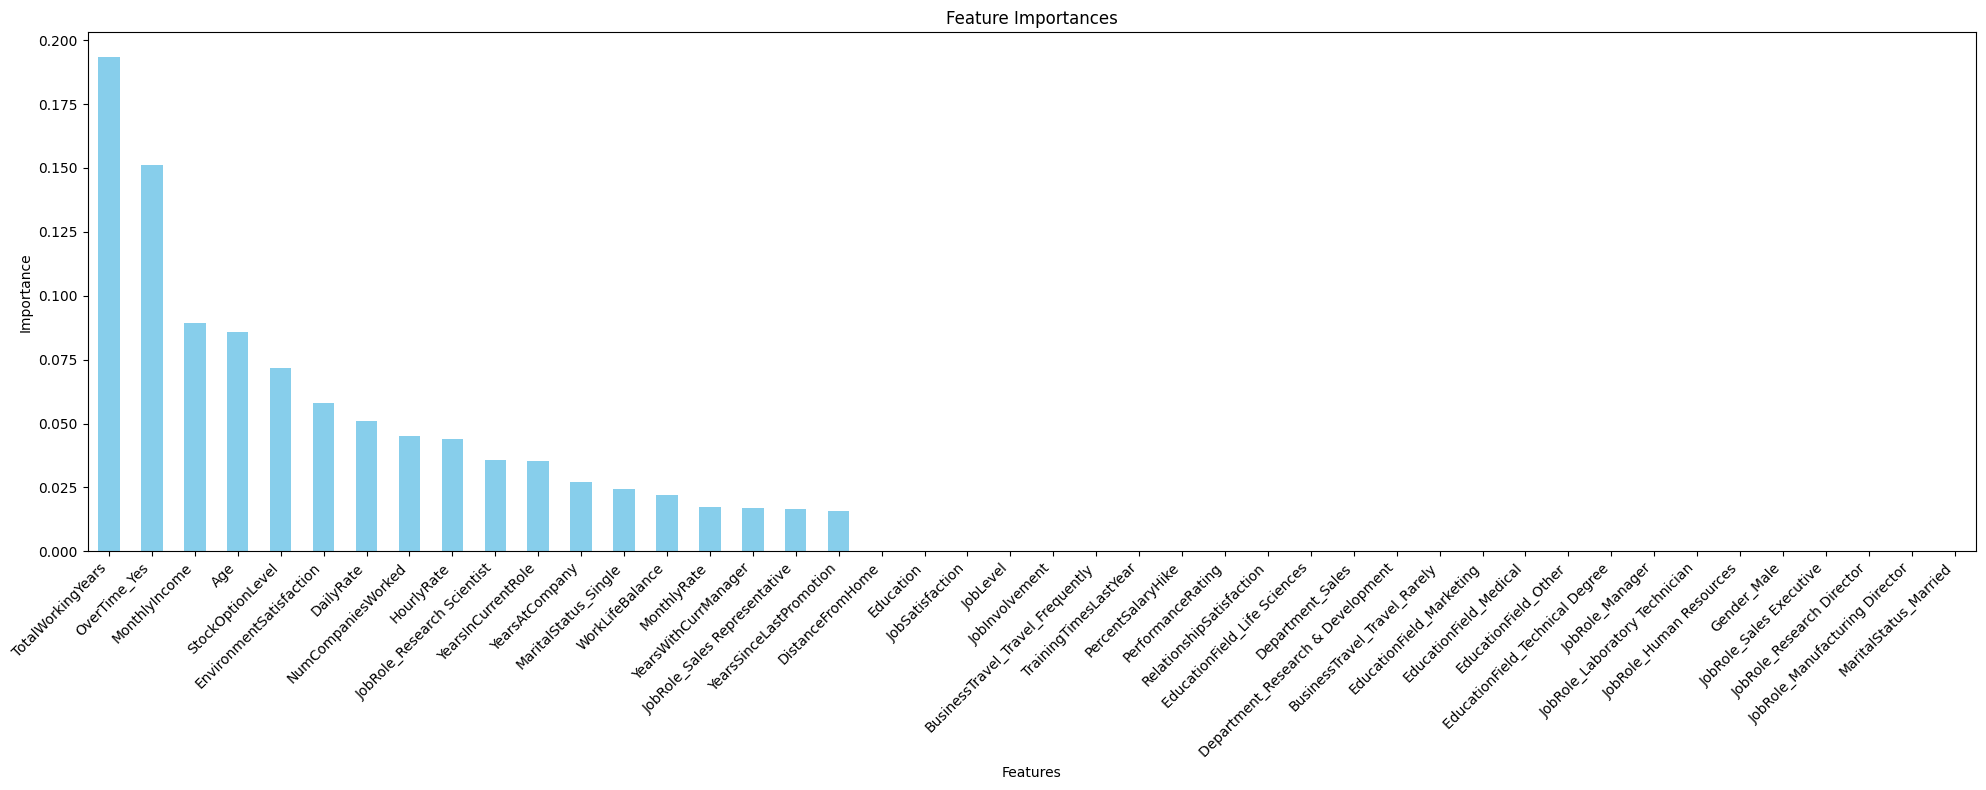

In [19]:
plt.figure(figsize=(20,8))  # overall plot ka size
importances = pd.Series(model1.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

importances.plot(kind="bar", color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Feature Importances (Decision Tree).png")

plt.xticks(rotation=45, ha='right')  # x-axis labels ko readable bana deta hai
plt.tight_layout()  # cut hone se bachata hai
plt.show()

## *Visualizing the Decision Tree Structure*


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\1870034979.py:4: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Decision Tree .png")


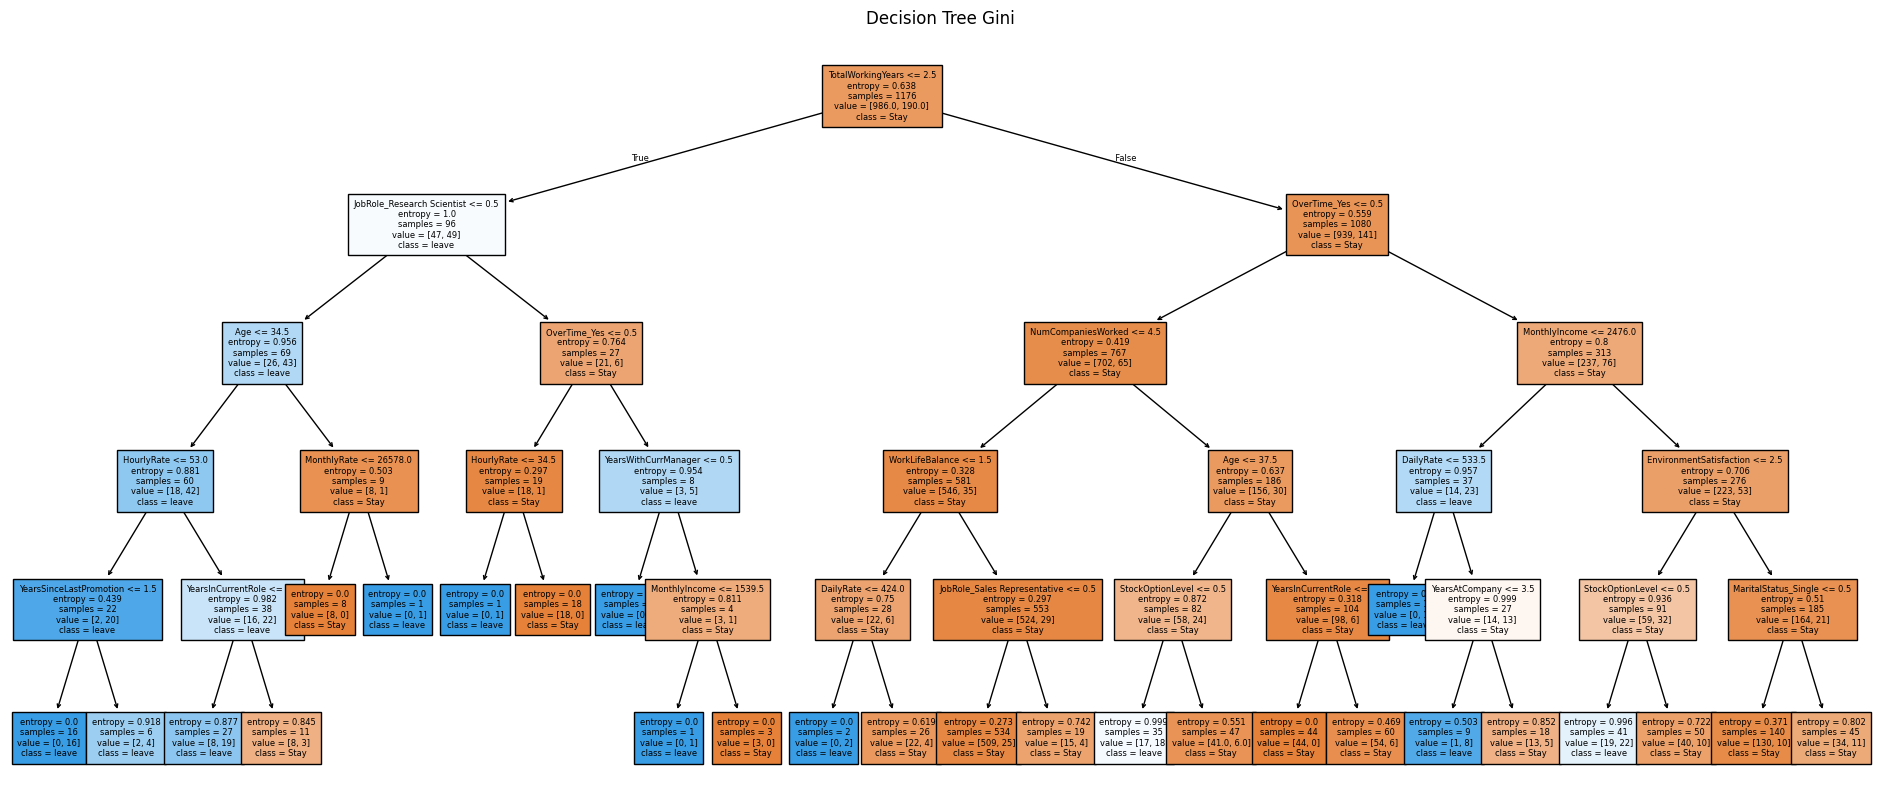

In [20]:
plt.figure(figsize=(24, 10))
plot_tree(model1 ,   filled = True , feature_names=X.columns  , class_names=["Stay" , "leave"] , fontsize=6)
plt.title("Decision Tree Gini")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Decision Tree .png")

## **Applying Random Forest Classifier Model**


## *Training the Random Forest Classifier*


In [21]:
model2 = RandomForestClassifier(n_estimators=100 , max_depth=None , random_state=42 , n_jobs=-1 , class_weight="balanced")
model2.fit(X_train , Y_train)
# n_jobs=-1 --> Utilize all CPU Cores


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## *Making Predictions using Random Forest Classifier*


In [22]:
y_pred_R = model2.predict(X_test)

## *Evaluating the Random Forest Classifier Performance*


In [23]:
print("Accurarcy : " , round(accuracy_score(Y_test , y_pred_R)*100 , 3) , "%")
print( classification_report(Y_test , y_pred_R))

Accurarcy :  83.673 %
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



## *Visualizing the Confusion Matrix for Decision Tree Model*


<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2323758600.py:5: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Confusion_Matrix(Random Forest).png")


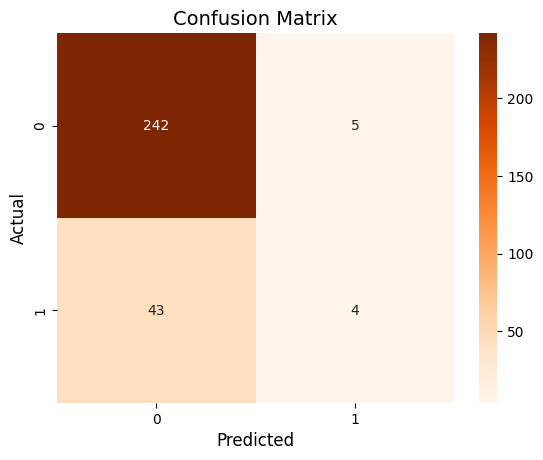

In [24]:
sn.heatmap(confusion_matrix(Y_test, y_pred_R), annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Confusion_Matrix(Random Forest).png")
plt.show()


## *Visualizing the Correlation Heatmap of Numerical Features*


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2002988655.py:4: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Heatmap (Random Forest)).png")


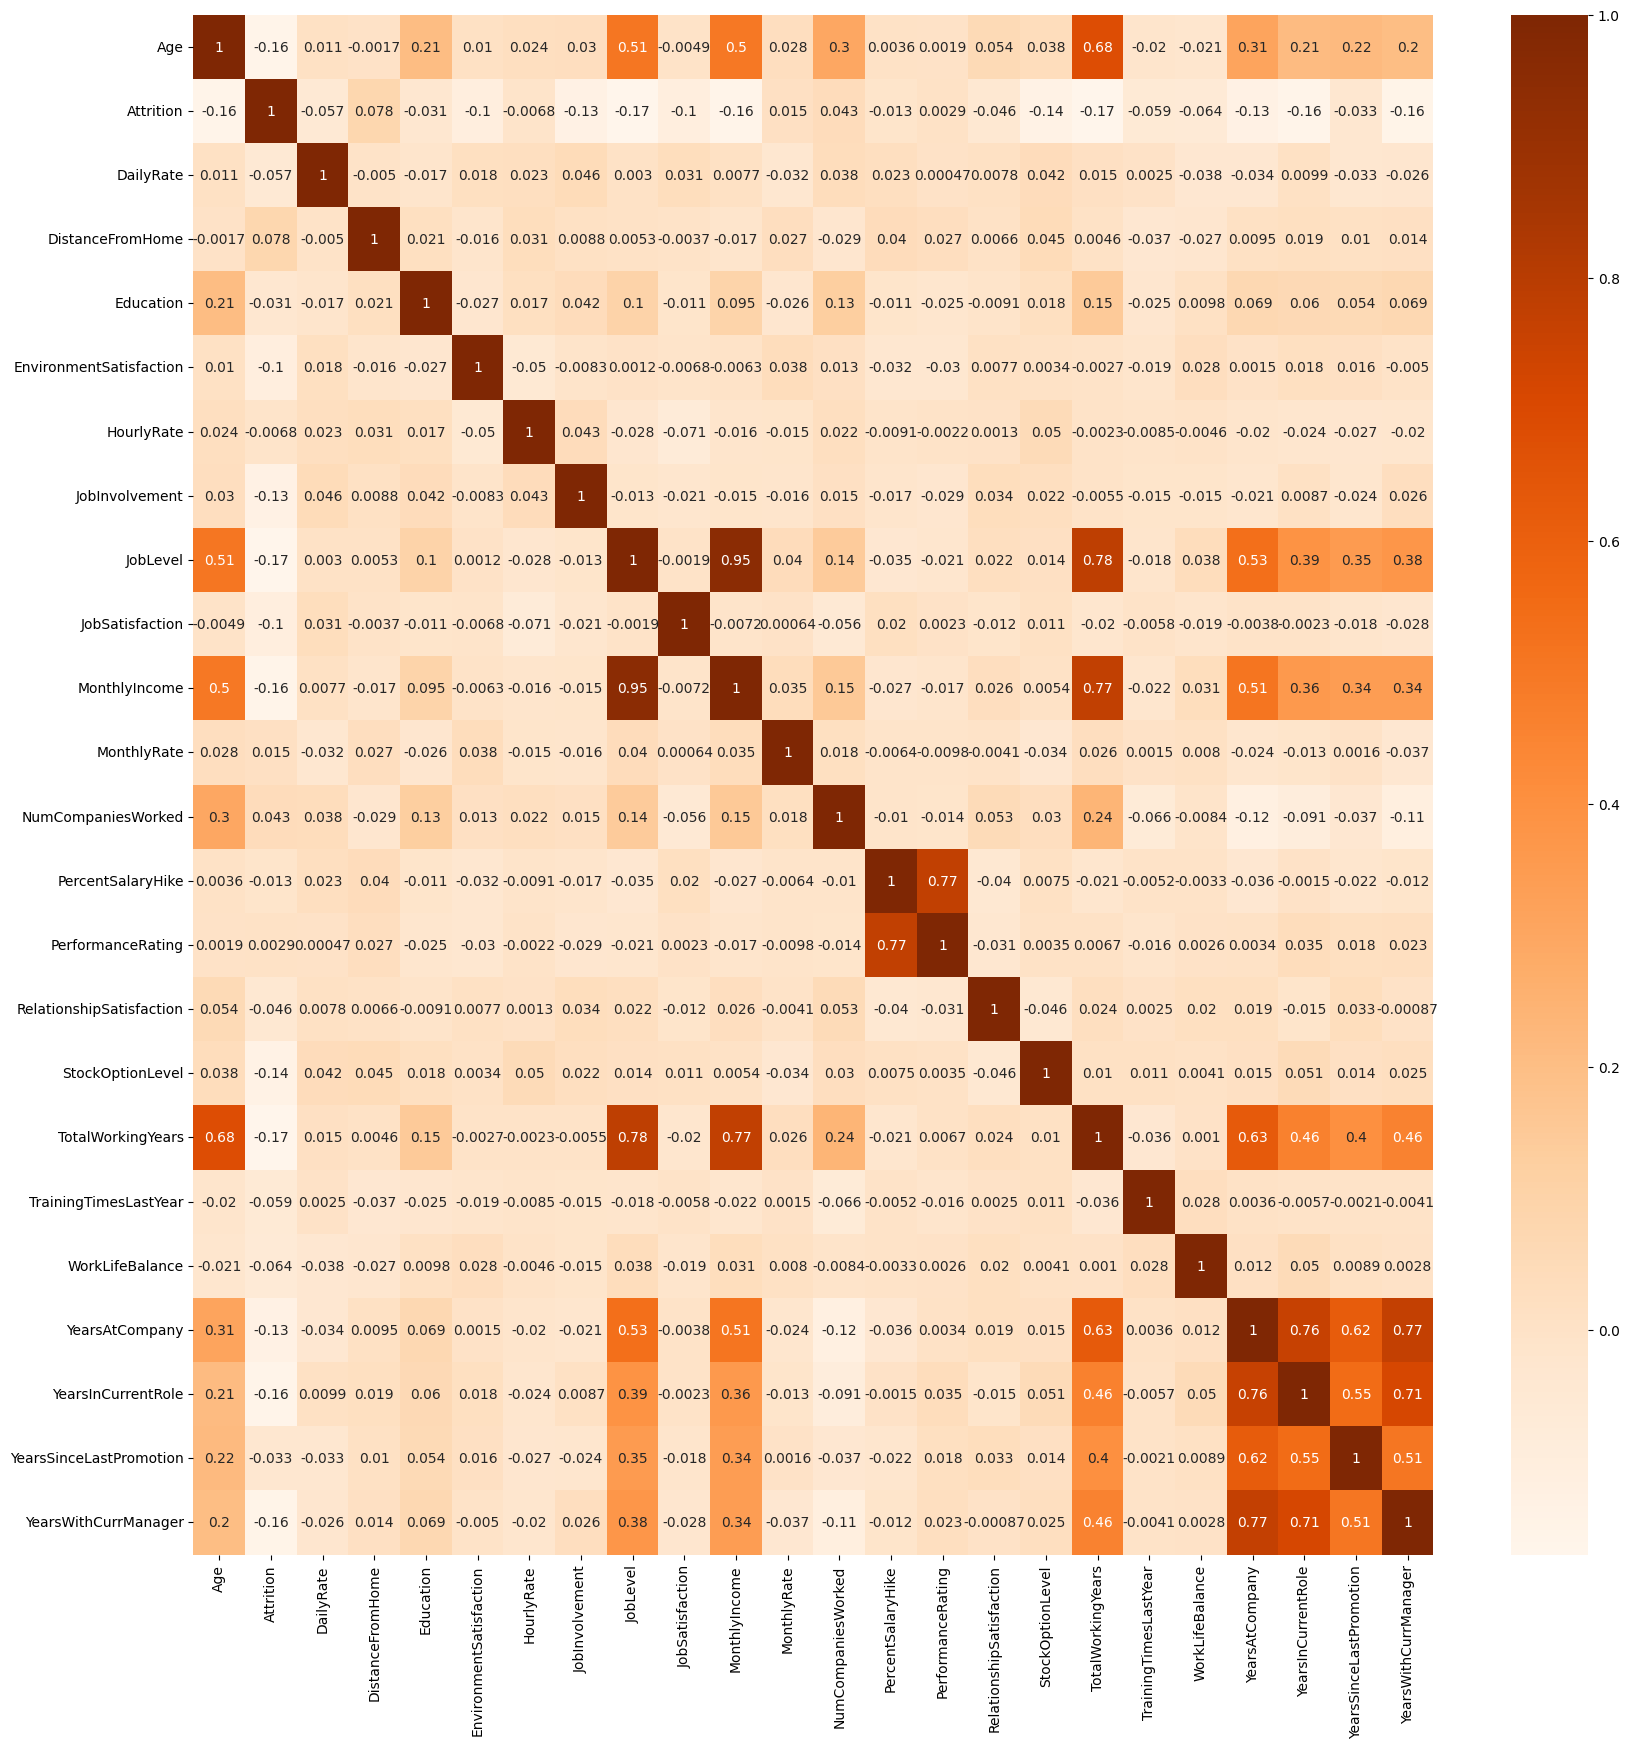

In [25]:
plt.figure(figsize=(20 , 20))
df1 = Dataset.select_dtypes("int64")
sn.heatmap(df1.corr(), annot = True ,cmap = "Oranges")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Heatmap (Random Forest)).png")

plt.show()

## *Viewing Feature Importance of the Random Forest Model*


In [26]:
importance = pd.Series(model2.feature_importances_ , index = X.columns).sort_values(ascending=False)
importance

MonthlyIncome                        0.075157
Age                                  0.068066
TotalWorkingYears                    0.053865
DailyRate                            0.052450
YearsAtCompany                       0.048968
MonthlyRate                          0.047673
HourlyRate                           0.044192
DistanceFromHome                     0.043070
YearsWithCurrManager                 0.042613
OverTime_Yes                         0.042462
NumCompaniesWorked                   0.040574
PercentSalaryHike                    0.032279
StockOptionLevel                     0.029909
YearsInCurrentRole                   0.028361
EnvironmentSatisfaction              0.026393
JobSatisfaction                      0.025068
WorkLifeBalance                      0.024797
YearsSinceLastPromotion              0.023943
RelationshipSatisfaction             0.022991
JobLevel                             0.022499
TrainingTimesLastYear                0.022125
JobInvolvement                    

## *Visualizing Feature Importances of the Random Forest Model*


<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\3358179898.py:9: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Feature Importances (Random Forest).png")


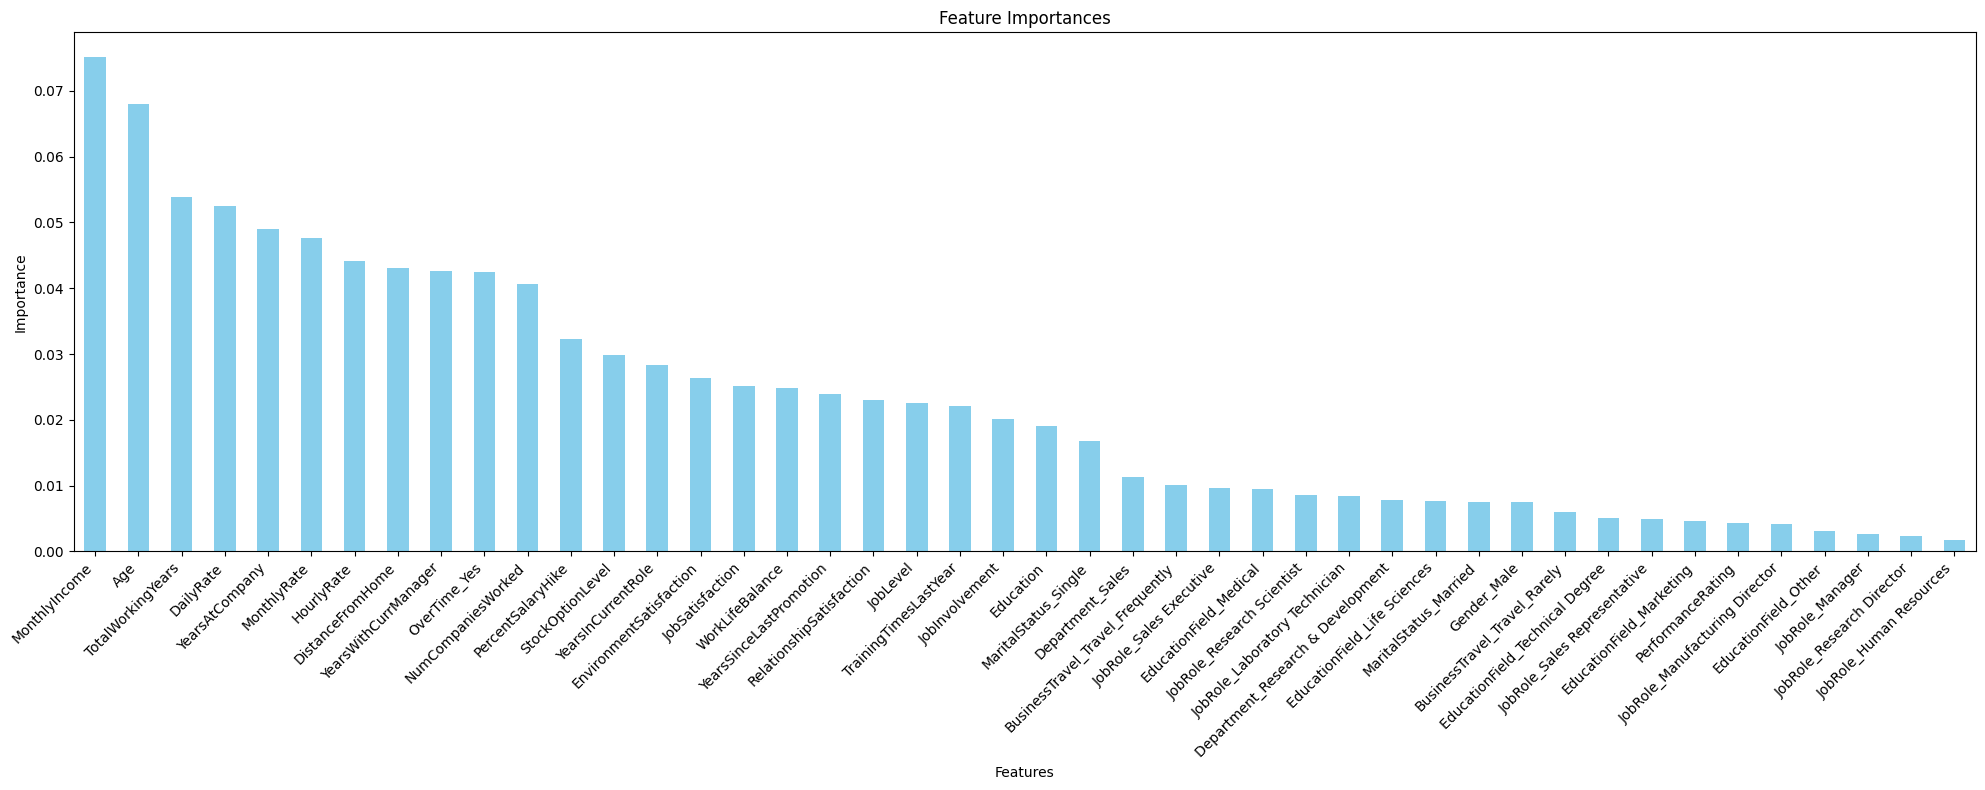

In [27]:
plt.figure(figsize=(20,8))  # overall plot ka size
importances = pd.Series(model2.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

importances.plot(kind="bar", color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Feature Importances (Random Forest).png")
plt.xticks(rotation=45, ha='right')  # x-axis labels ko readable bana deta hai
plt.tight_layout()  # cut hone se bachata hai
plt.show()

## **Applying Support Vector Machine (SVM) Model**

## *Standardizing Feature Variables using StandardScaler*


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## *Training the Support Vector Machine (SVM) Model*


In [29]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, Y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## *Making Predictions using the Trained SVM Model*


In [30]:
y_pred = svm_model.predict(X_test_scaled)


## *Evaluating the Performance of the SVM Model*


In [31]:
accuracy = accuracy_score(Y_test, y_pred)
print("\nAccuracy:", round(accuracy * 100, 2), "%")

print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 86.73 %

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.90      0.19      0.32        47

    accuracy                           0.87       294
   macro avg       0.88      0.59      0.62       294
weighted avg       0.87      0.87      0.83       294



## *Visualizing Correlation Heatmap of All Numerical Features*


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\3215864861.py:4: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Heatmap (SVM).png")


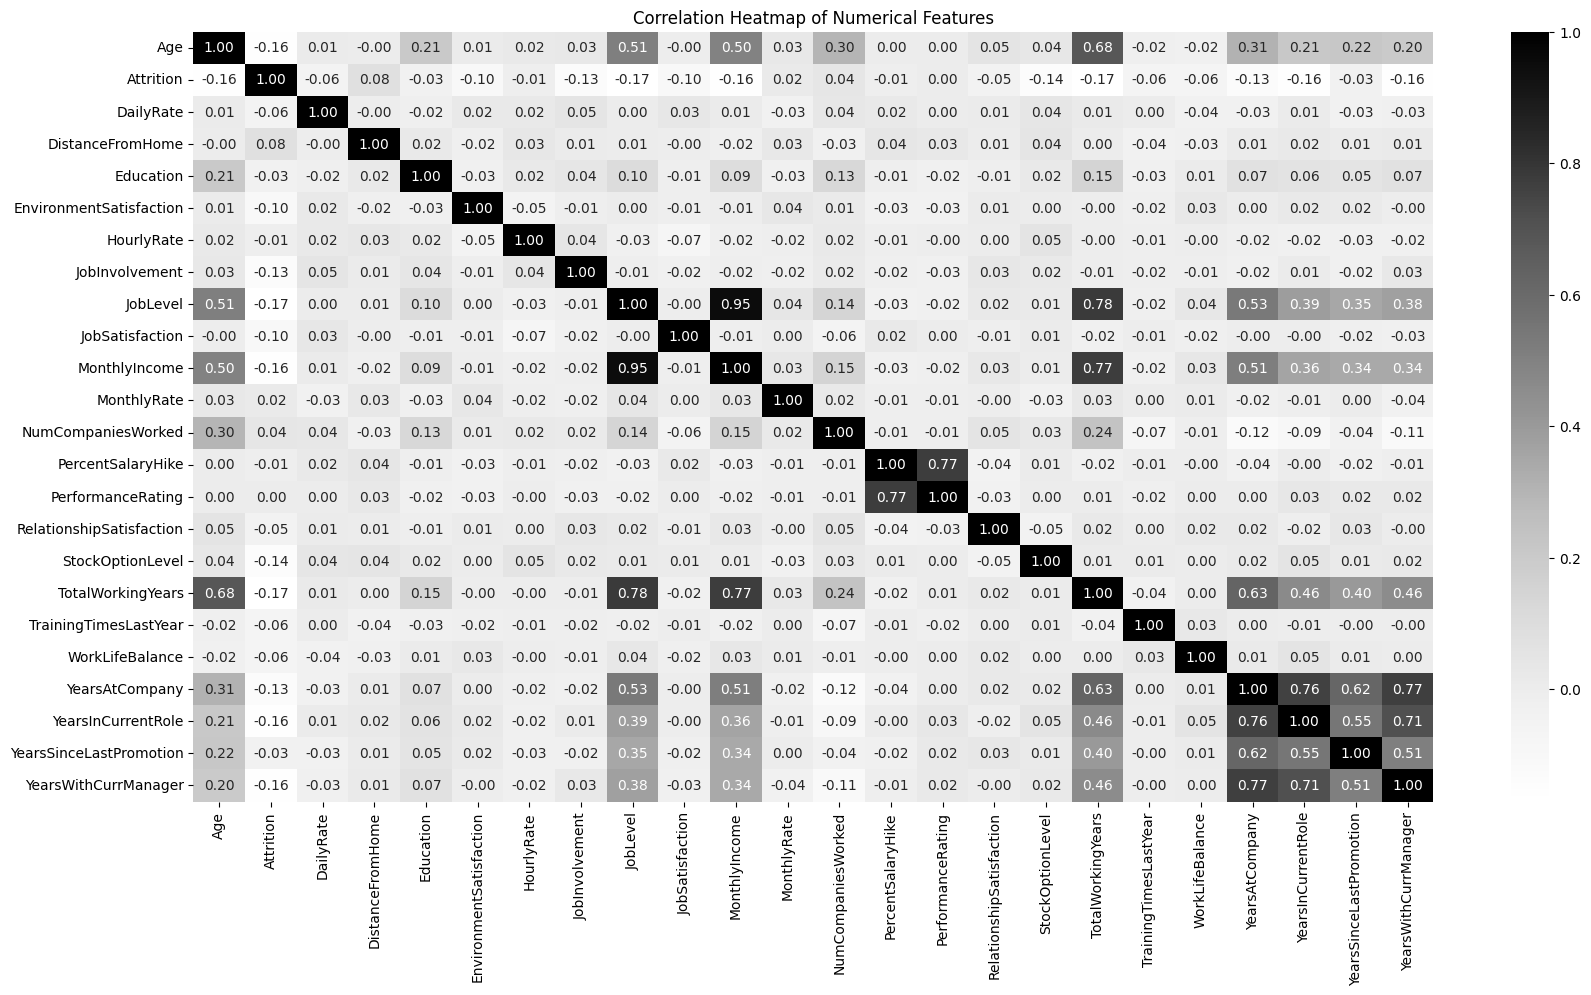

In [32]:
plt.figure(figsize=(20,10))
df_numeric = Dataset.select_dtypes(include="int64")  # numeric columns
sn.heatmap(df_numeric.corr(), annot=True, cmap="Greys", fmt=".2f")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Heatmap (SVM).png")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## *Visualizing the Confusion Matrix for the SVM Model*


<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\1509829157.py:8: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Confusion_Matrix(SVM).png")


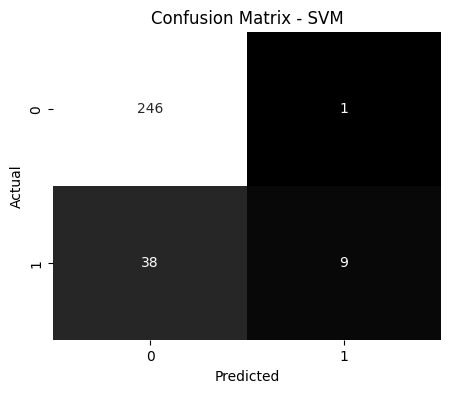

In [33]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="d", cmap="gray", cbar=False)
# sn.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Confusion_Matrix(SVM).png")
plt.show()

## *Training the Linear SVM Model*


In [34]:
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train_scaled, Y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## *Visualizing Feature Importance using Linear SVM Coefficients*


<>:12: SyntaxWarning: invalid escape sequence '\A'
<>:12: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_15500\2734200480.py:12: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Feature Importances (SVM).png")


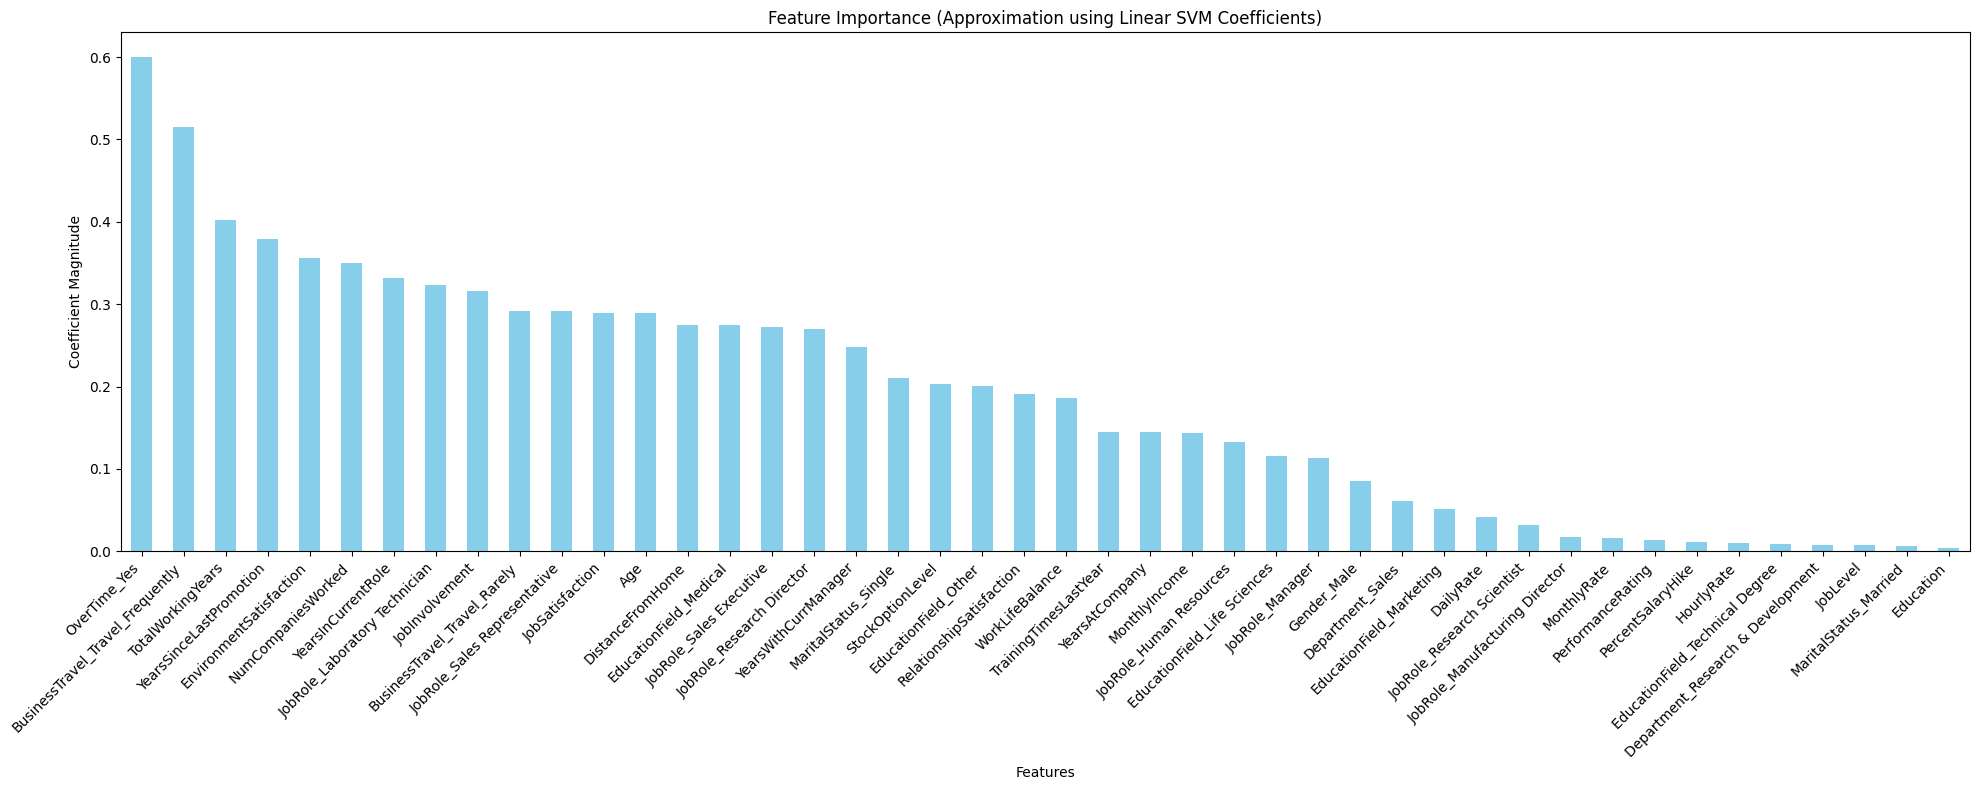

In [35]:
# Feature importance-like values
importances = pd.Series(abs(svm_linear.coef_[0]), index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(20,8))
importances.plot(kind="bar", color='skyblue')
plt.title("Feature Importance (Approximation using Linear SVM Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.xticks(rotation=45, ha='right')
plt.savefig("E:\AI and Data Science\Machine Learning Learning with Muhammad Javed\Result/Feature Importances (SVM).png")
plt.tight_layout()
plt.show()